### 회귀(Regression)

- 주어진 독립변수(피처)와 종속변수(결정 값) 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾는 것
    - 회귀는 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법

#### 회귀모델 성능지표

- MAE(Mean Absolute Error) : 실제 값과 예측값의 차이를 절대값으로 변환해 평균
- MSE(Mean Squared Error) : 실제 값과 예측값의 차이를 제곱해 평균
- RMSE(Root Mean Absolute Error) : MAE에 루트를 씌운 것, MSE 값은 실제값과 예측값의 차이를 제곱하여 평균한 것이기 때문에 실제 오차보다 커지는 현상이 발생
- R^2 : 
    - 1-(추정모형의 MSE/평균 관측 값의 MSE)로 계산
    - 0에서 1사이의 값
    - 선형 모델의 오차가 작다면 R squared가 커지게 되고 선형 모델의 오차가 크다면 R squared가 작아지게 됨

#### LinearRegression을 이용한 보스턴 주택 가격 예측

- CRIM : 지역별 범죄 발생률
- ZN : 25,000평방피트를 초과하는 거주 지역 비율
- INDUS : 비상업 지역 넓이 비율
- CHAS : 찰스강에 대한 더미변수(강의 경계에 위치한 경우 1, 아니면 0)
- NOX : 일산화질소 농도
- RM : 거주할 수 있는 방 개수
- AGE : 1940년 이전에 건축된 소유 주택의 비율
- DIS : 5개 주요 고용센터까지의 가중 거리
- RAD : 고속도로 접근 용이도
- TAX : 10,000 달러 당 재산세율
- PTRATIO : 지역의 교사와 학생 수 비율
- B : 지역의 흑인 거주 비율
- LSTAT : 하위 계층의 비율
- PRICE(target) : 본인 소유의 주택 가격(중앙값)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
boston = load_boston()

boston_df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
boston_df['PRICE'] = boston['target']
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [6]:
# target과 feature의 산점도의 선형회귀 직선 그래프
def boston_reg(col):
    sns.regplot(x=col, y='PRICE', data=boston_df)
    plt.title(col)
    plt.show()

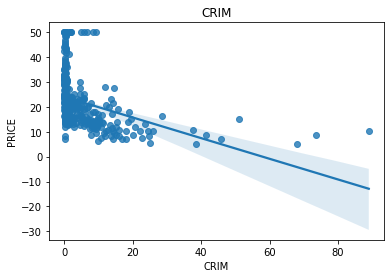

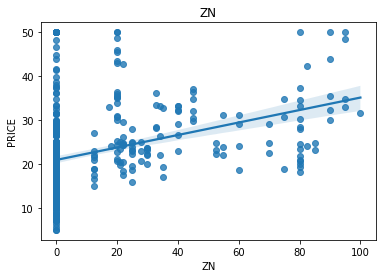

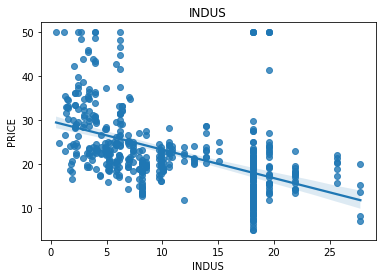

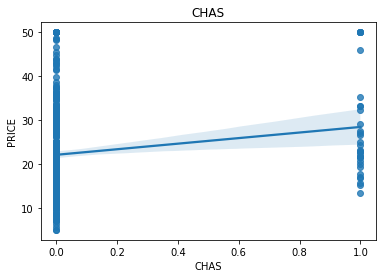

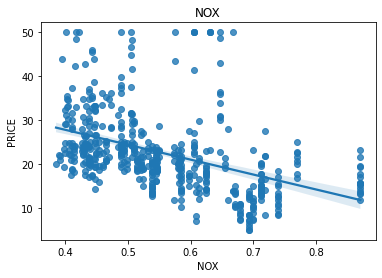

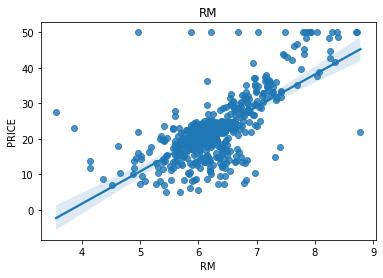

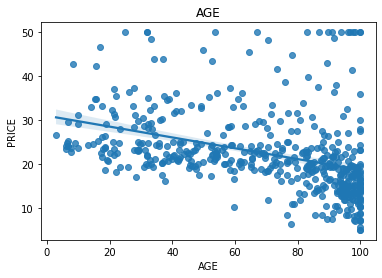

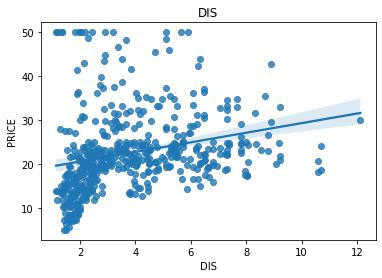

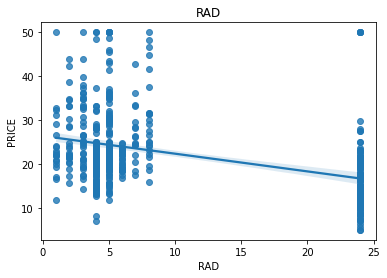

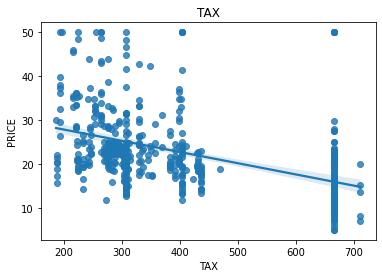

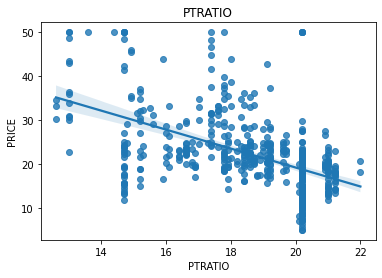

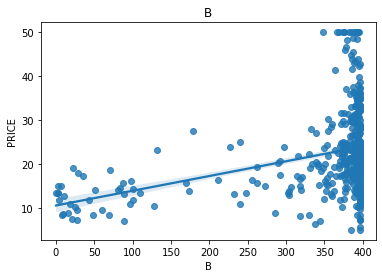

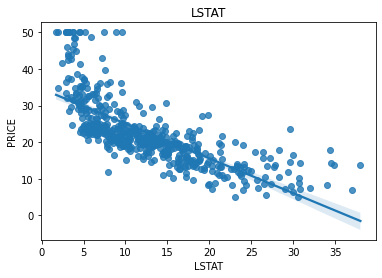

In [7]:
for col in boston_df.columns[:-1]:
    boston_reg(col)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
X_train, X_test, y_train, y_test = train_test_split(boston_df.iloc[:,:-1], boston_df.iloc[:,-1], random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

print(f'train : {train_score}')
print(f'test : {test_score}')

train : 0.727564767519276
test : 0.7708110072194128


In [10]:
print(lr.intercept_)
print(lr.coef_)

41.073427354124426
[-1.11303280e-01  6.42165144e-02  5.78708278e-02  2.71935030e+00
 -2.10027998e+01  3.46553377e+00  3.73779691e-03 -1.69581767e+00
  3.49148163e-01 -1.40328287e-02 -9.47110307e-01  9.87818281e-03
 -5.55248288e-01]


In [11]:
print(f'{lr.intercept_}')

# 위치정보값을 넣어줌
for i, v in enumerate(lr.coef_):
    print(f'+{v}*x{i}')

41.073427354124426
+-0.11130327990479971*x0
+0.06421651437953874*x1
+0.057870827756650145*x2
+2.7193502950103254*x3
+-21.002799799187716*x4
+3.4655337650193725*x5
+0.0037377969055167543*x6
+-1.6958176654969035*x7
+0.34914816255396897*x8
+-0.014032828663726182*x9
+-0.9471103066096401*x10
+0.009878182812319839*x11
+-0.5552482879861168*x12


In [16]:
MSE = mean_squared_error(y_test, pred)
RMSE = mean_squared_error(y_test, pred, squared = False)
R2 = r2_score(y_test, pred)

print(f'MSE = {MSE}, RMSE = {RMSE}, R2 = {R2}')

MSE = 17.179746860481536, RMSE = 4.144845818662201, R2 = 0.7708110072194128


#### 규제 선형 모델

- 규제는 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것
    - 릿지 회귀 : 계수를 제곱한 값을 기준으로 규제를 적용
    - 라쏘 회귀 : 계수의 절댓값을 기준으로 규제를 적용
    - 엘라스틱넷 회귀
- 규제의 양을 임의로 조절
    - 모델 객체를 만들 때 alpha 변수를 조정
    - alpha가 크면 규제 강도가 세져 과소적합을 유도
    - alpha가 작으면 규제 강도를 줄이는 역할을 하여 과대적합 될 가능성이 높음

In [18]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [41]:
X_train, X_test, y_train, y_test = train_test_split(boston_df.iloc[:,:-1], boston_df.iloc[:,-1], random_state=156)

In [52]:
def get_linear(model_name, X_train, X_test, y_train, y_test):
    alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
    train_score = []
    test_score = []
    r2 = []
    
    for param in alpha_list:
        if model_name == 'Ridge' : model = Ridge(alpha=param)
        elif model_name == 'Lasso' : model = Lasso(alpha=param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha=param, l1_ratio = 0.7)
                    
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        train_score.append(model.score(X_train, y_train))
        test_score.append(model.score(X_test, y_test))
        r2.append(r2_score(y_test, pred))
    
    plt.plot(np.log10(alpha_list), train_score, label = 'train')
    plt.plot(np.log10(alpha_list), test_score, label = 'test')
    plt.legend()
    plt.show()

    idx = r2.index(max(r2))

    return alpha_list[idx], max(r2)


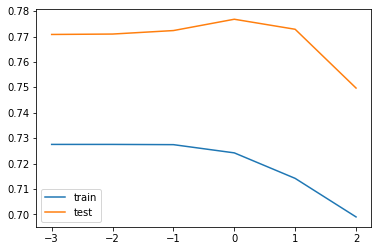

(1, 0.7768160930644925)

In [53]:
get_linear('Ridge', X_train, X_test, y_train, y_test) # underfitting

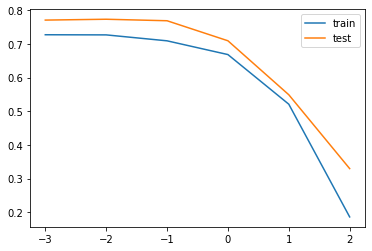

(0.01, 0.7736712607184891)

In [54]:
get_linear('Lasso', X_train, X_test, y_train, y_test)

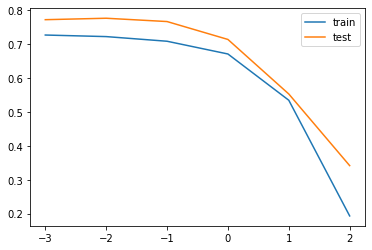

(0.01, 0.7769911389096962)

In [55]:
get_linear('ElasticNet', X_train, X_test, y_train, y_test)

In [56]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [57]:
X_train, X_test, y_train, y_test = train_test_split(boston_df.iloc[:,:-1], boston_df.iloc[:,-1], random_state=156)

In [58]:
model_dic = {
    "LinearRegression" : LinearRegression(),
    "Ridge" : Ridge(alpha=1),
    "Lasso" : Lasso(alpha=0.01),
    "ElasticNet" : ElasticNet(alpha=0.01),
    "GradientBoostingRegressor" : GradientBoostingRegressor(),
    "Random Forest" : RandomForestRegressor(max_depth=5, n_estimators=10, max_features=1),
    "svm" : SVR()
}

In [59]:
model_p = {}
model_r2 = {}

for key in model_dic.keys() :
    model = model_dic[key]
    print(f'{key} : training')
    model.fit(X_train, y_train)
    
    print(f'{key} : predict')
    model_p[key] = model.predict(X_test)
    model_r2[key] = r2_score(y_test, model_p[key])

LinearRegression : training
LinearRegression : predict
Ridge : training
Ridge : predict
Lasso : training
Lasso : predict
ElasticNet : training
ElasticNet : predict
GradientBoostingRegressor : training
GradientBoostingRegressor : predict
Random Forest : training
Random Forest : predict
svm : training
svm : predict


In [60]:
result = pd.DataFrame()
result['모델'] = model_p.keys()
result['R2'] = model_r2.values()
result.sort_values('R2', ascending=False)

,모델,R2
4,GradientBoostingRegressor,0.909759
3,ElasticNet,0.776852
1,Ridge,0.776816
2,Lasso,0.773671
0,LinearRegression,0.770811
5,Random Forest,0.721885
6,svm,0.331828
